from https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

In [1]:
import numpy as np
import pandas as pd

## Object creation

In [2]:
# Creating a Series by passing a list of values, letting pandas create a default integer index
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [38]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns
dates = pd.date_range("20220101", periods=6)
dates

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06'],
              dtype='datetime64[ns]', freq='D')

In [39]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2022-01-01,1.723528,-0.128219,1.481502,1.021577
2022-01-02,0.135508,-0.152518,1.295621,0.425262
2022-01-03,0.342443,0.549190,-1.043857,-0.392233
2022-01-04,-0.841876,0.177338,-0.661157,0.845283
2022-01-05,-0.500844,1.301229,-0.513196,0.600703
2022-01-06,-0.004571,0.137917,0.325726,-0.381167


In [40]:
# Creating a DataFrame by passing a dictionary of objects that can be converted into a series-like structure
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20220102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(['test', 'train', 'test', 'train']),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2022-01-02,1.0,3,test,foo
1,1.0,2022-01-02,1.0,3,train,foo
2,1.0,2022-01-02,1.0,3,test,foo
3,1.0,2022-01-02,1.0,3,train,foo


In [41]:
# The columns of the resulting DataFrame have different dtypes
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing data

In [42]:
# Here is how to view the top and bottom rows of the frame
df.head()

,A,B,C,D
2022-01-01,1.723528,-0.128219,1.481502,1.021577
2022-01-02,0.135508,-0.152518,1.295621,0.425262
2022-01-03,0.342443,0.549190,-1.043857,-0.392233
2022-01-04,-0.841876,0.177338,-0.661157,0.845283
2022-01-05,-0.500844,1.301229,-0.513196,0.600703


In [43]:
df.tail(3)

,A,B,C,D
2022-01-04,-0.841876,0.177338,-0.661157,0.845283
2022-01-05,-0.500844,1.301229,-0.513196,0.600703
2022-01-06,-0.004571,0.137917,0.325726,-0.381167


In [44]:
# Display the index, columns
df.index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06'],
              dtype='datetime64[ns]', freq='D')

In [45]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [46]:
# NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column
# this process is fast due to all data being floating points and doesn't require data copying 
df.to_numpy()

array([[ 1.72352757, -0.12821919,  1.48150204,  1.02157705],
       [ 0.13550805, -0.15251788,  1.29562057,  0.42526201],
       [ 0.34244252,  0.54918971, -1.04385743, -0.39223339],
       [-0.84187641,  0.17733799, -0.66115705,  0.84528281],
       [-0.5008444 ,  1.30122904, -0.51319639,  0.60070273],
       [-0.00457142,  0.13791676,  0.32572589, -0.38116698]])

In [47]:
# this process is expensive due to all data being different and needing array dtype to change to object
df2.to_numpy()

array([[1.0, Timestamp('2022-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2022-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2022-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2022-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

**DataFrame.to_numpy() does not include the index or column labels in the output.**

In [48]:
# describe() shows a quick statistic summary of your data
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.142364,0.314156,0.147440,0.353237
std,0.888166,0.546409,1.062006,0.608324
min,-0.841876,-0.152518,-1.043857,-0.392233
25%,-0.376776,-0.061685,-0.624167,-0.179560
50%,0.065468,0.157627,-0.093735,0.512982
75%,0.290709,0.456227,1.053147,0.784138
max,1.723528,1.301229,1.481502,1.021577


In [49]:
# Transposing your data
df.T

,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06
A,1.723528,0.135508,0.342443,-0.841876,-0.500844,-0.004571
B,-0.128219,-0.152518,0.549190,0.177338,1.301229,0.137917
C,1.481502,1.295621,-1.043857,-0.661157,-0.513196,0.325726
D,1.021577,0.425262,-0.392233,0.845283,0.600703,-0.381167


In [50]:
# Sorting by an axis
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2022-01-01,1.021577,1.481502,-0.128219,1.723528
2022-01-02,0.425262,1.295621,-0.152518,0.135508
2022-01-03,-0.392233,-1.043857,0.549190,0.342443
2022-01-04,0.845283,-0.661157,0.177338,-0.841876
2022-01-05,0.600703,-0.513196,1.301229,-0.500844
2022-01-06,-0.381167,0.325726,0.137917,-0.004571


In [51]:
# Sorting by values
df.sort_values(by="B")

,A,B,C,D
2022-01-02,0.135508,-0.152518,1.295621,0.425262
2022-01-01,1.723528,-0.128219,1.481502,1.021577
2022-01-06,-0.004571,0.137917,0.325726,-0.381167
2022-01-04,-0.841876,0.177338,-0.661157,0.845283
2022-01-03,0.342443,0.549190,-1.043857,-0.392233
2022-01-05,-0.500844,1.301229,-0.513196,0.600703


## Selection

**While standard Python / NumPy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.**

### Getting

In [52]:
# Selecting a single column, which yields a Series, equivalent to df.A
df["A"]

2022-01-01    1.723528
2022-01-02    0.135508
2022-01-03    0.342443
2022-01-04   -0.841876
2022-01-05   -0.500844
2022-01-06   -0.004571
Freq: D, Name: A, dtype: float64

In [53]:
# Selecting via [], which slices the rows
df[0:3]

,A,B,C,D
2022-01-01,1.723528,-0.128219,1.481502,1.021577
2022-01-02,0.135508,-0.152518,1.295621,0.425262
2022-01-03,0.342443,0.549190,-1.043857,-0.392233


In [54]:
# Selecting via [], which slices the rows
df['20220102':'20220104']

,A,B,C,D
2022-01-02,0.135508,-0.152518,1.295621,0.425262
2022-01-03,0.342443,0.549190,-1.043857,-0.392233
2022-01-04,-0.841876,0.177338,-0.661157,0.845283


### Selection by label

In [55]:
# For getting a cross section using a label
df.loc[dates[0]]

A    1.723528
B   -0.128219
C    1.481502
D    1.021577
Name: 2022-01-01 00:00:00, dtype: float64

In [56]:
# Selecting on a multi-axis by label
df.loc[:, ["A","B"]]

,A,B
2022-01-01,1.723528,-0.128219
2022-01-02,0.135508,-0.152518
2022-01-03,0.342443,0.549190
2022-01-04,-0.841876,0.177338
2022-01-05,-0.500844,1.301229
2022-01-06,-0.004571,0.137917


In [57]:
# Showing label slicing, both endpoints are included
df.loc['20220102':'20220104',['A', 'B']]

,A,B
2022-01-02,0.135508,-0.152518
2022-01-03,0.342443,0.549190
2022-01-04,-0.841876,0.177338


In [58]:
# For getting a scalar value
df.loc[dates[0], 'A']

1.7235275730995057

In [59]:
# For getting fast access to a scalar (equivalent to the prior method)
df.at[dates[0], 'A']

1.7235275730995057

### Selection by position

In [60]:
# Select via the position of the passed integers
df.iloc[3]

A   -0.841876
B    0.177338
C   -0.661157
D    0.845283
Name: 2022-01-04 00:00:00, dtype: float64

In [61]:
# By integer slices, acting similar to NumPy/Python
df.iloc[3:5, 0:2]

,A,B
2022-01-04,-0.841876,0.177338
2022-01-05,-0.500844,1.301229


In [62]:
# By lists of integer position locations, similar to the NumPy/Python style
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2022-01-02,0.135508,1.295621
2022-01-03,0.342443,-1.043857
2022-01-05,-0.500844,-0.513196


In [63]:
# For slicing rows explicitly
df.iloc[1:3, :]

,A,B,C,D
2022-01-02,0.135508,-0.152518,1.295621,0.425262
2022-01-03,0.342443,0.549190,-1.043857,-0.392233


In [64]:
# For slicing columns explicitly
df.iloc[:, 1:3]

,B,C
2022-01-01,-0.128219,1.481502
2022-01-02,-0.152518,1.295621
2022-01-03,0.549190,-1.043857
2022-01-04,0.177338,-0.661157
2022-01-05,1.301229,-0.513196
2022-01-06,0.137917,0.325726


In [65]:
# For getting a value explicitly
df.iloc[1, 1]

-0.15251787965134603

In [66]:
# For getting fast access to a scalar (equivalent to the prior method)
df.iat[1, 1]

-0.15251787965134603

### Boolean indexing

In [67]:
# Using a single column’s values to select data
df[df['A'] > 0]

,A,B,C,D
2022-01-01,1.723528,-0.128219,1.481502,1.021577
2022-01-02,0.135508,-0.152518,1.295621,0.425262
2022-01-03,0.342443,0.549190,-1.043857,-0.392233


In [68]:
# Selecting values from a DataFrame where a boolean condition is met
df[df > 0]

,A,B,C,D
2022-01-01,1.723528,NaN,1.481502,1.021577
2022-01-02,0.135508,NaN,1.295621,0.425262
2022-01-03,0.342443,0.549190,NaN,NaN
2022-01-04,NaN,0.177338,NaN,0.845283
2022-01-05,NaN,1.301229,NaN,0.600703
2022-01-06,NaN,0.137917,0.325726,NaN


In [70]:
# Using the isin() method for filtering
df2 = df.copy()
df2['E'] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2022-01-01,1.723528,-0.128219,1.481502,1.021577,one
2022-01-02,0.135508,-0.152518,1.295621,0.425262,one
2022-01-03,0.342443,0.549190,-1.043857,-0.392233,two
2022-01-04,-0.841876,0.177338,-0.661157,0.845283,three
2022-01-05,-0.500844,1.301229,-0.513196,0.600703,four
2022-01-06,-0.004571,0.137917,0.325726,-0.381167,three


In [72]:
# Using the isin() method for filtering
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2022-01-03,0.342443,0.549190,-1.043857,-0.392233,two
2022-01-05,-0.500844,1.301229,-0.513196,0.600703,four


### Setting

In [74]:
# Setting a new column automatically aligns the data by the indexes
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20220102", periods=6))
s1

2022-01-02    1
2022-01-03    2
2022-01-04    3
2022-01-05    4
2022-01-06    5
2022-01-07    6
Freq: D, dtype: int64

In [75]:
df['F'] = s1

In [76]:
# Setting values by label
df.at[dates[0], 'A'] = 0

In [77]:
# Setting values by position
df.iat[0, 1] = 0

In [78]:
# Setting by assigning with a NumPy array
df.loc[:, 'D'] = np.array([5] * len(df))

In [79]:
# The result of the prior setting operations
df

,A,B,C,D,F
2022-01-01,0.000000,0.000000,1.481502,5,NaN
2022-01-02,0.135508,-0.152518,1.295621,5,1.0
2022-01-03,0.342443,0.549190,-1.043857,5,2.0
2022-01-04,-0.841876,0.177338,-0.661157,5,3.0
2022-01-05,-0.500844,1.301229,-0.513196,5,4.0
2022-01-06,-0.004571,0.137917,0.325726,5,5.0


In [80]:
# A where operation with setting
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2022-01-01,0.000000,0.000000,-1.481502,-5,NaN
2022-01-02,-0.135508,-0.152518,-1.295621,-5,-1.0
2022-01-03,-0.342443,-0.549190,-1.043857,-5,-2.0
2022-01-04,-0.841876,-0.177338,-0.661157,-5,-3.0
2022-01-05,-0.500844,-1.301229,-0.513196,-5,-4.0
2022-01-06,-0.004571,-0.137917,-0.325726,-5,-5.0


## Missing Data

In [82]:
# Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2022-01-01,0.000000,0.000000,1.481502,5,NaN,1.0
2022-01-02,0.135508,-0.152518,1.295621,5,1.0,1.0
2022-01-03,0.342443,0.549190,-1.043857,5,2.0,NaN
2022-01-04,-0.841876,0.177338,-0.661157,5,3.0,NaN


In [83]:
# To drop any rows that have missing data
df1.dropna(how='any')

,A,B,C,D,F,E
2022-01-02,0.135508,-0.152518,1.295621,5,1.0,1.0


In [84]:
# Filling missing data
df1.fillna(value=5)

,A,B,C,D,F,E
2022-01-01,0.000000,0.000000,1.481502,5,5.0,1.0
2022-01-02,0.135508,-0.152518,1.295621,5,1.0,1.0
2022-01-03,0.342443,0.549190,-1.043857,5,2.0,5.0
2022-01-04,-0.841876,0.177338,-0.661157,5,3.0,5.0


In [85]:
# To get the boolean mask where values are nan
pd.isna(df1)

,A,B,C,D,F,E
2022-01-01,False,False,False,False,True,False
2022-01-02,False,False,False,False,False,False
2022-01-03,False,False,False,False,False,True
2022-01-04,False,False,False,False,False,True


## Operations

### Stats

In [86]:
# Performing a descriptive statistic
df.mean()

A   -0.144890
B    0.335526
C    0.147440
D    5.000000
F    3.000000
dtype: float64

In [87]:
# Same operation on the other axis
df.mean(1)

2022-01-01    1.620376
2022-01-02    1.455722
2022-01-03    1.369555
2022-01-04    1.334861
2022-01-05    1.857438
2022-01-06    2.091814
Freq: D, dtype: float64

In [88]:
# Operating with objects that have different dimensionality and need alignment.
# In addition, pandas automatically broadcasts along the specified dimension
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2022-01-01    NaN
2022-01-02    NaN
2022-01-03    1.0
2022-01-04    3.0
2022-01-05    5.0
2022-01-06    NaN
Freq: D, dtype: float64

In [89]:
df.sub(s, axis='index')

,A,B,C,D,F
2022-01-01,NaN,NaN,NaN,NaN,NaN
2022-01-02,NaN,NaN,NaN,NaN,NaN
2022-01-03,-0.657557,-0.450810,-2.043857,4.0,1.0
2022-01-04,-3.841876,-2.822662,-3.661157,2.0,0.0
2022-01-05,-5.500844,-3.698771,-5.513196,0.0,-1.0
2022-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

In [90]:
# Applying functions to the data
df.apply(np.cumsum)

,A,B,C,D,F
2022-01-01,0.000000,0.000000,1.481502,5,NaN
2022-01-02,0.135508,-0.152518,2.777123,10,1.0
2022-01-03,0.477951,0.396672,1.733265,15,3.0
2022-01-04,-0.363926,0.574010,1.072108,20,6.0
2022-01-05,-0.864770,1.875239,0.558912,25,10.0
2022-01-06,-0.869342,2.013156,0.884638,30,15.0


In [91]:
df.apply(lambda x: x.max() - x.min())

A    1.184319
B    1.453747
C    2.525359
D    0.000000
F    4.000000
dtype: float64

### Histogramming

In [93]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    4
1    2
2    5
3    6
4    1
5    6
6    4
7    0
8    4
9    1
dtype: int32

In [94]:
s.value_counts()

4    3
6    2
1    2
2    1
5    1
0    1
dtype: int64

### String Methods

In [96]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

In [97]:
# Concatenating pandas objects together with concat()
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-1.002336,-1.541666,0.521127,-0.654693
1,-0.389304,1.108661,-0.372613,-0.844803
2,1.477226,-0.921771,-0.592801,0.070618
3,0.092176,0.526909,-0.179206,-0.341637
4,-0.124659,-0.491983,0.128114,0.311013
5,-0.033167,0.699617,-1.015626,-0.588733
6,-0.513036,0.013730,-1.038938,1.357196
7,0.361030,-0.742520,-0.308847,-0.761689
8,-0.722221,-0.193519,0.578962,-0.572565
9,0.900591,0.170176,0.709274,-0.706652


In [100]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -1.002336 -1.541666  0.521127 -0.654693
 1 -0.389304  1.108661 -0.372613 -0.844803
 2  1.477226 -0.921771 -0.592801  0.070618,
           0         1         2         3
 3  0.092176  0.526909 -0.179206 -0.341637
 4 -0.124659 -0.491983  0.128114  0.311013
 5 -0.033167  0.699617 -1.015626 -0.588733
 6 -0.513036  0.013730 -1.038938  1.357196,
           0         1         2         3
 7  0.361030 -0.742520 -0.308847 -0.761689
 8 -0.722221 -0.193519  0.578962 -0.572565
 9  0.900591  0.170176  0.709274 -0.706652]

In [99]:
pd.concat(pieces)

,0,1,2,3
0,-1.002336,-1.541666,0.521127,-0.654693
1,-0.389304,1.108661,-0.372613,-0.844803
2,1.477226,-0.921771,-0.592801,0.070618
3,0.092176,0.526909,-0.179206,-0.341637
4,-0.124659,-0.491983,0.128114,0.311013
5,-0.033167,0.699617,-1.015626,-0.588733
6,-0.513036,0.013730,-1.038938,1.357196
7,0.361030,-0.742520,-0.308847,-0.761689
8,-0.722221,-0.193519,0.578962,-0.572565
9,0.900591,0.170176,0.709274,-0.706652


**Adding a column to a DataFrame is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the DataFrame constructor instead of building a DataFrame by iteratively appending records to it.**

### Join

In [101]:
# SQL style merges. See the Database style joining section
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [102]:
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [103]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [104]:
# Another example that can be given is
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [105]:
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [106]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:
- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

In [107]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

df

,A,B,C,D
0,foo,one,1.099106,0.562222
1,bar,one,-0.713410,-0.157210
2,foo,two,-2.705933,1.081947
3,bar,three,-0.562961,-2.122748
4,foo,two,-0.537059,-0.616981
5,bar,two,1.191461,0.701680
6,foo,one,0.113322,0.044980
7,foo,three,-0.511193,0.935762


In [108]:
# Grouping and then applying the sum() function to the resulting groups
df.groupby("A").sum()

,C,D
A,,
bar,-0.084909,-1.578278
foo,-2.541757,2.007930


In [109]:
# Grouping by multiple columns forms a hierarchical index, and again we can apply the sum() function
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.713410 -0.157210
    three -0.562961 -2.122748
    two    1.191461  0.701680
foo one    1.212428  0.607202
    three -0.511193  0.935762
    two   -3.242992  0.464966

## Reshaping

### Stack

In [110]:
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)

index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

df2 = df[:4]

df2

A         B
first second                    
bar   one    -0.324718  1.026708
      two     1.431519  1.136859
baz   one     0.268425 -1.713699
      two     1.035240 -0.109052

In [111]:
# The stack() method “compresses” a level in the DataFrame’s columns
stacked = df2.stack()

stacked

first  second   
bar    one     A   -0.324718
               B    1.026708
       two     A    1.431519
               B    1.136859
baz    one     A    0.268425
               B   -1.713699
       two     A    1.035240
               B   -0.109052
dtype: float64

In [113]:
# With a “stacked” DataFrame or Series (having a MultiIndex as the index),
# the inverse operation of stack() is unstack(), which by default unstacks the last level:
stacked.unstack()

A         B
first second                    
bar   one    -0.324718  1.026708
      two     1.431519  1.136859
baz   one     0.268425 -1.713699
      two     1.035240 -0.109052

In [114]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.324718  1.431519
      B  1.026708  1.136859
baz   A  0.268425  1.035240
      B -1.713699 -0.109052

In [115]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.324718  0.268425
       B  1.026708 -1.713699
two    A  1.431519  1.035240
       B  1.136859 -0.109052

### Pivot tables

In [2]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

df

,A,B,C,D,E
0,one,A,foo,0.152378,1.451236
1,one,B,foo,-0.288079,-1.187320
2,two,C,foo,-2.064821,-1.426705
3,three,A,bar,-0.045497,0.696980
4,one,B,bar,0.205467,-1.129836
5,one,C,bar,1.478654,-0.025707
6,two,A,foo,-1.664620,-0.777131
7,three,B,foo,-0.878005,-1.274821
8,one,C,foo,-0.509601,1.519160
9,one,A,bar,1.724907,1.302802


In [3]:
# We can produce pivot tables from this data very easily
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  1.724907  0.152378
      B  0.205467 -0.288079
      C  1.478654 -0.509601
three A -0.045497       NaN
      B       NaN -0.878005
      C  0.260021       NaN
two   A       NaN -1.664620
      B -0.762592       NaN
      C       NaN -2.064821

## Times Series

In [4]:
rng = pd.date_range("1/1/2022", periods=100, freq="S")

ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

ts.resample("5Min").sum()

2022-01-01    25731
Freq: 5T, dtype: int32

In [5]:
# Time zone representation
rng = pd.date_range("3/6/2022 00:00", periods=5, freq="D")

ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2022-03-06    1.288633
2022-03-07   -0.244283
2022-03-08    0.299374
2022-03-09    0.206481
2022-03-10    1.977053
Freq: D, dtype: float64

In [6]:
ts_utc = ts.tz_localize("UTC")

ts_utc

2022-03-06 00:00:00+00:00    1.288633
2022-03-07 00:00:00+00:00   -0.244283
2022-03-08 00:00:00+00:00    0.299374
2022-03-09 00:00:00+00:00    0.206481
2022-03-10 00:00:00+00:00    1.977053
Freq: D, dtype: float64

In [8]:
# Converting to another time zone
ts_utc.tz_convert("US/Eastern")

2022-03-05 19:00:00-05:00    1.288633
2022-03-06 19:00:00-05:00   -0.244283
2022-03-07 19:00:00-05:00    0.299374
2022-03-08 19:00:00-05:00    0.206481
2022-03-09 19:00:00-05:00    1.977053
Freq: D, dtype: float64

In [9]:
# Converting between time span representations
rng = pd.date_range("1/1/2022", periods=5, freq="M")

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2022-01-31   -1.238064
2022-02-28    0.634763
2022-03-31   -0.740779
2022-04-30   -1.760716
2022-05-31   -0.783535
Freq: M, dtype: float64

In [10]:
ps = ts.to_period()

ps

2022-01   -1.238064
2022-02    0.634763
2022-03   -0.740779
2022-04   -1.760716
2022-05   -0.783535
Freq: M, dtype: float64

In [11]:
ps.to_timestamp()

2022-01-01   -1.238064
2022-02-01    0.634763
2022-03-01   -0.740779
2022-04-01   -1.760716
2022-05-01   -0.783535
Freq: MS, dtype: float64

In [12]:
# Converting between period and timestamp enables some convenient arithmetic functions to be used.
# In the following example, we convert a quarterly frequency
# with year ending in November to 9am of the end of the month following the quarter end
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")

ts = pd.Series(np.random.randn(len(prng)), prng)

ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9

ts.head()

1990-03-01 09:00   -0.778670
1990-06-01 09:00    0.726580
1990-09-01 09:00    1.557935
1990-12-01 09:00   -1.507811
1991-03-01 09:00    1.505099
Freq: H, dtype: float64

## Categoricals

In [13]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

In [14]:
# Converting the raw grades to a categorical data type
df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [15]:
# Rename the categories to more meaningful names (assigning to Series.cat.categories() is in place!)
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [16]:
# Reorder the categories and simultaneously add the missing categories (methods under Series.cat() return a new Series by default)
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)


df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [17]:
# Sorting is per order in the categories, not lexical order
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [18]:
# Grouping by a categorical column also shows empty categories
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

In [19]:
# We use the standard convention for referencing the matplotlib API
import matplotlib.pyplot as plt

plt.close("all")

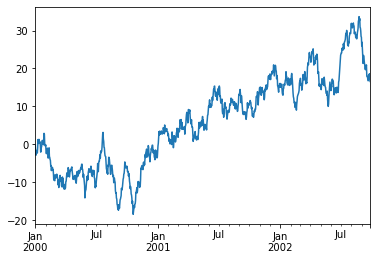

In [20]:
# The close() method is used to close a figure window
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot();

In [21]:
# If running under Jupyter Notebook, the plot will appear on plot().
# Otherwise use matplotlib.pyplot.show to show it or matplotlib.pyplot.savefig to write it to a file.
plt.show();

<Figure size 432x288 with 0 Axes>

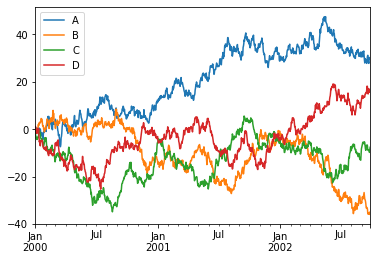

In [22]:
# On a DataFrame, the plot() method is a convenience to plot all of the columns with labels
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)


df = df.cumsum()

plt.figure();

df.plot();

plt.legend(loc='best');

## Getting data in/out

### CSV

In [23]:
# Writing to a csv file
df.to_csv("foo.csv")

In [24]:
# Reading from a csv file
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.071420,0.365351,-0.651536,1.077861
1,2000-01-02,0.623587,0.023812,-2.821186,0.934537
2,2000-01-03,0.481135,-1.049161,-3.067701,-0.056403
3,2000-01-04,-0.542238,-1.286450,-4.051694,-1.443025
4,2000-01-05,-0.636742,-0.695708,-3.576407,-1.128094
...,...,...,...,...,...
995,2002-09-22,27.707312,-35.629135,-8.937702,17.027124
996,2002-09-23,29.252742,-35.779589,-9.188316,15.939645
997,2002-09-24,30.185967,-35.063742,-9.814998,15.498126
998,2002-09-25,30.040278,-35.001628,-8.615582,16.410072


### HDF5

In [25]:
# Writing to a HDF5 Store
df.to_hdf("foo.h5", "df")

In [26]:
# Reading from a HDF5 Store
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,-1.071420,0.365351,-0.651536,1.077861
2000-01-02,0.623587,0.023812,-2.821186,0.934537
2000-01-03,0.481135,-1.049161,-3.067701,-0.056403
2000-01-04,-0.542238,-1.286450,-4.051694,-1.443025
2000-01-05,-0.636742,-0.695708,-3.576407,-1.128094
...,...,...,...,...
2002-09-22,27.707312,-35.629135,-8.937702,17.027124
2002-09-23,29.252742,-35.779589,-9.188316,15.939645
2002-09-24,30.185967,-35.063742,-9.814998,15.498126
2002-09-25,30.040278,-35.001628,-8.615582,16.410072


### Excel

In [27]:
# Writing to an excel file
df.to_excel("foo.xlsx", sheet_name="Sheet1")

In [28]:
# Reading from an excel file
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.071420,0.365351,-0.651536,1.077861
1,2000-01-02,0.623587,0.023812,-2.821186,0.934537
2,2000-01-03,0.481135,-1.049161,-3.067701,-0.056403
3,2000-01-04,-0.542238,-1.286450,-4.051694,-1.443025
4,2000-01-05,-0.636742,-0.695708,-3.576407,-1.128094
...,...,...,...,...,...
995,2002-09-22,27.707312,-35.629135,-8.937702,17.027124
996,2002-09-23,29.252742,-35.779589,-9.188316,15.939645
997,2002-09-24,30.185967,-35.063742,-9.814998,15.498126
998,2002-09-25,30.040278,-35.001628,-8.615582,16.410072


### Gotchas

In [29]:
# If you are attempting to perform an operation you might see an exception like
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().